# Import necessary libraries

In [193]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re
import distance as dist
import difflib
import jellyfish

# Read tweets

In [208]:
tweets = pd.read_csv("tweets.csv")
tweets.head()

C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (15,60,61,62,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,25073877,1041493551446675456,2018-09-17T01:06:27Z,realDonaldTrump,Consumer Sentiment hit its highest level in 17...,Twitter for iPhone,151,NaN,NaN,NaN,...,38973,25,2009-03-18T13:46:38Z,True,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8742761973...
1,25073877,1041451203442487297,2018-09-16T22:18:10Z,realDonaldTrump,Best economic numbers in decades. If the Democ...,Twitter for iPhone,99,NaN,NaN,NaN,...,38973,25,2009-03-18T13:46:38Z,True,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8742761973...
2,25073877,1041441676949184512,2018-09-16T21:40:19Z,realDonaldTrump,Watch @MariaBartiromo at 6:00 P.M. on @FoxBusi...,Twitter for iPhone,172,NaN,NaN,NaN,...,38973,25,2009-03-18T13:46:38Z,True,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8742761973...
3,25073877,1041438771366060034,2018-09-16T21:28:46Z,realDonaldTrump,Congratulations to all of our Mexican friends ...,Twitter for iPhone,115,NaN,NaN,NaN,...,38973,25,2009-03-18T13:46:38Z,True,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8742761973...
4,25073877,1041380969377406981,2018-09-16T17:39:05Z,realDonaldTrump,.@DevinNunes: “I think full transparency is in...,Twitter for iPhone,127,NaN,NaN,NaN,...,38973,25,2009-03-18T13:46:38Z,True,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8742761973...


# Data cleaning

In [209]:
#function which removes characters
def clean_tweet(tweet):
    return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet)

<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-209-b6b6d9e98494>:3: DeprecationWarning: invalid escape sequence \w
  return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet)


In [210]:
tweets['text'] = np.array([ clean_tweet(tweet) for tweet in tweets['text'] ])

In [211]:
tweets['text'].head()

0    Consumer Sentiment hit its highest level in 17...
1    Best economic numbers in decades  If the Democ...
2    Watch   at 6 00 P M  on    Russian Hoax the bi...
3    Congratulations to all of our Mexican friends ...
4         I think full transparency is in order her...
Name: text, dtype: object

In [212]:
#lowercase letters
tweets['text'] = tweets['text'].str.lower()

In [213]:
#remove whitespaces
tweets['text'] = np.array([tweet.strip() for tweet in tweets['text'] ])
tweets['text'].head()

0    consumer sentiment hit its highest level in 17...
1    best economic numbers in decades  if the democ...
2    watch   at 6 00 p m  on    russian hoax the bi...
3    congratulations to all of our mexican friends ...
4    i think full transparency is in order here    ...
Name: text, dtype: object

In [214]:
#choose just necessary columns
tw_words = tweets[['name', 'text']]
tw_words.head()

,name,text
0,Donald J. Trump,consumer sentiment hit its highest level in 17...
1,Donald J. Trump,best economic numbers in decades if the democ...
2,Donald J. Trump,watch at 6 00 p m on russian hoax the bi...
3,Donald J. Trump,congratulations to all of our mexican friends ...
4,Donald J. Trump,i think full transparency is in order here ...


In [215]:
#find english stopwords
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marija.Miljkovic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Tokenize words

In [216]:
#tokenize words, drop english stopwords and lemmatize tokens
tw_words['tokens'] = tw_words[['name', 'text']].apply(lambda row:word_tokenize(row['text']),axis=1)
tw_tokens['tokens'] = tw_tokens['tokens'].apply(lambda x: [token for token in x if token not in en_stop])
tw_tokens['tokens'] = tw_tokens['tokens'].apply(lambda x: [get_lemma(token) for token in x])
tw_words.head()

C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name,text,tokens
0,Donald J. Trump,consumer sentiment hit its highest level in 17...,"[consumer, sentiment, hit, its, highest, level..."
1,Donald J. Trump,best economic numbers in decades if the democ...,"[best, economic, numbers, in, decades, if, the..."
2,Donald J. Trump,watch at 6 00 p m on russian hoax the bi...,"[watch, at, 6, 00, p, m, on, russian, hoax, th..."
3,Donald J. Trump,congratulations to all of our mexican friends ...,"[congratulations, to, all, of, our, mexican, f..."
4,Donald J. Trump,i think full transparency is in order here ...,"[i, think, full, transparency, is, in, order, ..."


In [217]:
#save dataframes
tw_sentences = tw_words
tw_tokens = tw_words

In [218]:
#extract tokens
s = tw_words.apply(lambda x: pd.Series(x['tokens']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'tokens'
tw_words = tw_words.drop('tokens', axis=1).join(s)
tw_words['tokens'] = pd.Series(tw_words['tokens'], dtype=object)
tw_words.head()

,name,text,tokens
0,Donald J. Trump,consumer sentiment hit its highest level in 17...,consumer
0,Donald J. Trump,consumer sentiment hit its highest level in 17...,sentiment
0,Donald J. Trump,consumer sentiment hit its highest level in 17...,hit
0,Donald J. Trump,consumer sentiment hit its highest level in 17...,its
0,Donald J. Trump,consumer sentiment hit its highest level in 17...,highest


In [219]:
#count number of particular tokens per person
tw_words = tw_words.groupby(['name', 'tokens']).count()
tw_words = tw_words.reset_index()
tw_words.columns = ['name', 'word', 'n']
tw_words = tw_words.sort_values('n', ascending=False)
tw_words.head()

,name,word,n
6616,Donald J. Trump,the,4770
480,Donald J. Trump,and,2720
6696,Donald J. Trump,to,2613
4631,Donald J. Trump,of,2068
21207,Hadley Wickham,the,1954


In [220]:
#total number of words per person
total_words = tw_words[['name','n']].groupby('name').sum()
total_words = total_words.reset_index()
total_words.columns=['name', 'total']
total_words

,name,total
0,Donald J. Trump,97672
1,Elon Musk,47560
2,Hadley Wickham,64886
3,Tim Ferriss,44937


In [221]:
tw_words = pd.merge(tw_words, total_words, how='left', on='name')
tw_words.head()

,name,word,n,total
0,Donald J. Trump,the,4770,97672
1,Donald J. Trump,and,2720,97672
2,Donald J. Trump,to,2613,97672
3,Donald J. Trump,of,2068,97672
4,Hadley Wickham,the,1954,64886


In [222]:
#rank words per person and count term_frequency
tw_words['rank'] = tw_words.groupby('name').cumcount()+1
freq_by_rank = tw_words
freq_by_rank['term_frequency'] = freq_by_rank['n']/freq_by_rank['total']
freq_by_rank.head(20)

,name,word,n,total,rank,term_frequency
0,Donald J. Trump,the,4770,97672,1,0.048837
1,Donald J. Trump,and,2720,97672,2,0.027848
2,Donald J. Trump,to,2613,97672,3,0.026753
3,Donald J. Trump,of,2068,97672,4,0.021173
4,Hadley Wickham,the,1954,64886,1,0.030114
5,Hadley Wickham,to,1916,64886,2,0.029529
6,Tim Ferriss,the,1848,44937,1,0.041124
7,Donald J. Trump,a,1734,97672,5,0.017753
8,Donald J. Trump,in,1456,97672,6,0.014907
9,Donald J. Trump,is,1437,97672,7,0.014713


In [223]:
#calculate column that will be needed for tf-idf
for_idf = tw_words.groupby(['word','name']).count().reset_index().groupby('word').sum().reset_index()
for_idf = for_idf[['word','n']]
for_idf.columns = ['word','foridf']
tw_words = pd.merge(tw_words, for_idf, how='left', on='word')
tw_words.head()

,name,word,n,total,rank,term_frequency,foridf
0,Donald J. Trump,the,4770,97672,1,0.048837,4
1,Donald J. Trump,and,2720,97672,2,0.027848,4
2,Donald J. Trump,to,2613,97672,3,0.026753,4
3,Donald J. Trump,of,2068,97672,4,0.021173,4
4,Hadley Wickham,the,1954,64886,1,0.030114,4


# TF-IDF

In [224]:
N = total_words.count()[0] #number of words
tw_words['tf'] = tw_words['n']/tw_words['total'] #calculate tf
tw_words['idf'] = np.log(N*1.0/(1+tw_words['foridf']*1.0)) #calculate idf
tw_words.loc[tw_words['idf'] <0, 'idf'] = 0 #use just non-negative values of idf
tw_words['tf_idf'] = tw_words['tf']*tw_words['idf'] #calculate tf-idf
tw_words.sort_values(by=['tf_idf'], ascending=False).head(10)

# Sentiment analysis

## Afinn package

In [230]:
#import afinn library
from afinn import Afinn

#calculate afinn score
tw_words['sentiment'] = np.array([ afinn.score(word) for word in tw_words['word'] ])

In [232]:
tw_words.sort_values(by='sentiment', ascending=False).head()

,name,word,n,total,rank,term_frequency,foridf,tf,idf,tf_idf,sentiment
4498,Donald J. Trump,thrilled,7,97672,1556,0.000072,3,0.000072,0.0,0.0,5.0
4467,Hadley Wickham,thrilled,7,64886,1089,0.000108,3,0.000108,0.0,0.0,5.0
23898,Elon Musk,outstanding,1,47560,5408,0.000021,4,0.000021,0.0,0.0,5.0
4784,Tim Ferriss,outstanding,7,44937,972,0.000156,4,0.000156,0.0,0.0,5.0
8479,Tim Ferriss,thrilled,3,44937,1740,0.000067,3,0.000067,0.0,0.0,5.0


In [233]:
#general sentiment per person
sentiments = tw_words.groupby(['name']).sum().reset_index()
sentiments = sentiments[['name', 'sentiment']]

In [234]:
sentiments

,name,sentiment
0,Donald J. Trump,-309.0
1,Elon Musk,-9.0
2,Hadley Wickham,242.0
3,Tim Ferriss,123.0


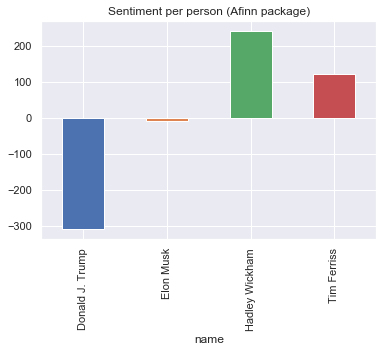

In [263]:
%matplotlib inline
import matplotlib.pyplot as plt


sentiments.plot.bar(x='name', y='sentiment',rot=90, title='Sentiment per person (Afinn package)', legend=False)

## TextBlob package

In [235]:
#import library
from textblob import TextBlob

In [236]:
#calculate polarity
tw_sentences['text_blob_sentiment'] = tw_sentences['text'].apply(lambda tweet: TextBlob(tweet).sentiment)
tw_sentences['sentiment'] = tw_sentences['text_blob_sentiment'].apply(lambda row: [x for x in row])
tw_sentences['polarity'] = tw_sentences['sentiment'].str[0]
tw_sentences.sort_values(by='polarity', ascending=False).head()

C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [238]:
#general polarity per person
blob_sentiments = tw_sentences.groupby(['name']).sum().reset_index()
blob_sentiments = blob_sentiments[['name', 'polarity']]
blob_sentiments

,name,polarity
0,Donald J. Trump,494.058759
1,Elon Musk,349.168503
2,Hadley Wickham,443.901284
3,Tim Ferriss,495.588522


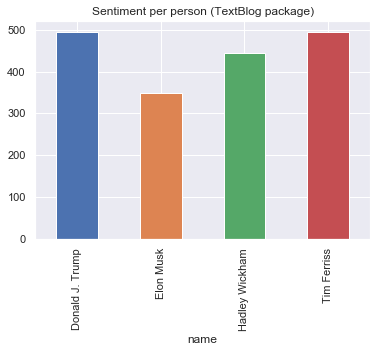

In [264]:
blob_sentiments.plot.bar(x='name', y='polarity',rot=90, title='Sentiment per person (TextBlog package)', legend=False)

## Create and analyze bigrams

In [240]:
#choose necessary columns
tw_bigrams = tw_sentences[['name', 'text']]
tw_bigrams.head()

In [242]:
#function for finding ngrams
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

In [243]:
#import library
from nltk import ngrams

#create bigrams
tw_bigrams['bigrams'] = tw_bigrams['text'].map(lambda x: find_ngrams(x.split(" "), 2))
tw_bigrams.head()

C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Topic modeling

In [245]:
#import libraries
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

#function for lemmatizing
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marija.Miljkovic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [246]:
#drop stopwords
tw_tokens['tokens'] = tw_tokens['tokens'].apply(lambda x: [token for token in x if token not in en_stop])

#lemmatize words
tw_tokens['tokens'] = tw_tokens['tokens'].apply(lambda x: [get_lemma(token) for token in x])

C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [248]:
tw_tokens.head()

,name,text,tokens,text_blob_sentiment,sentiment,polarity
0,Donald J. Trump,consumer sentiment hit its highest level in 17...,"[consumer, sentiment, hit, high, level, 17, ye...","(0.6, 0.95)","[0.6, 0.95]",0.600
1,Donald J. Trump,best economic numbers in decades if the democ...,"[best, economic, numbers, decade, democrat, ta...","(0.6, 0.25)","[0.6, 0.25]",0.600
2,Donald J. Trump,watch at 6 00 p m on russian hoax the bi...,"[watch, 6, 00, p, russian, hoax, big, topic, m...","(-0.075, 0.35000000000000003)","[-0.075, 0.35000000000000003]",-0.075
3,Donald J. Trump,congratulations to all of our mexican friends ...,"[congratulations, mexican, friend, national, i...","(0.4, 0.375)","[0.4, 0.375]",0.400
4,Donald J. Trump,i think full transparency is in order here ...,"[think, full, transparency, order, sundayfutures]","(0.35, 0.55)","[0.35, 0.55]",0.350


In [249]:
from gensim import corpora
import pickle
import gensim
import pyLDAvis.gensim

#create dictionary and corpus
dictionary = corpora.Dictionary(tw_tokens['tokens'])
corpus = [dictionary.doc2bow(text) for text in tw_tokens['tokens']]

#save dictionary
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [252]:
NUM_TOPICS = 5 #choose number of topics

#create LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim') #save model

topics = ldamodel.print_topics(num_words=10) #choose number of words per topic

#print topics
for topic in topics:
    print(topic)

(0, '0.013*"great" + 0.010*"amp" + 0.007*"get" + 0.007*"people" + 0.007*"model" + 0.007*"make" + 0.006*"big" + 0.005*"want" + 0.005*"time" + 0.005*"today"')
(1, '0.008*"people" + 0.007*"amp" + 0.006*"one" + 0.005*"know" + 0.005*"work" + 0.005*"art" + 0.005*"tbt" + 0.005*"4" + 0.004*"get" + 0.004*"like"')
(2, '0.015*"5" + 0.014*"tesla" + 0.009*"car" + 0.009*"amp" + 0.007*"20" + 0.007*"000" + 0.006*"10" + 0.006*"1" + 0.006*"travel" + 0.006*"world"')
(3, '0.017*"rstats" + 0.012*"new" + 0.011*"data" + 0.009*"r" + 0.007*"like" + 0.007*"use" + 0.006*"package" + 0.005*"want" + 0.005*"get" + 0.005*"science"')
(4, '0.015*"podcast" + 0.014*"episode" + 0.013*"book" + 0.008*"full" + 0.008*"yes" + 0.007*"interview" + 0.007*"time" + 0.007*"thanks" + 0.007*"one" + 0.007*"life"')


In [251]:
#load dictionary, corpus and model
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

#create visualization of topic modeling
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
